In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import floor
from keras import models
from keras import layers
from keras import optimizers
from scipy.integrate import odeint
import scipy
import pandas as pd

In [4]:
#Type IA supernova
url="https://raw.githubusercontent.com/JuanDDiosRojas/Arts/main/Deep%20Learning%20and%20its%20applications%20to%20cosmology/supernovas.txt"

### Gradient descent
This algorithm is based in the finite difference method.

In [2]:
# 1.Compute the k partial derivative, of a function g(x_1, x_2,...,x_k,...).
def partial(g, k, X):
    h = 1e-10
    Y = np.copy(X)
    X[k - 1] = X[k - 1] + h
    dp = (g(X) - g(Y)) / h
    return dp

# 2.Constructs the gradient vector of a function f evaluating in X, has a bound (cota) to avoid exploding 
#the magnitude of the gradient, but keeping its direction. 
def gradcot(f, X, cota):
    grd = []
    for i in np.arange(0, len(X)):
        ai = partial(f, i + 1, X)
        ai=float(ai)
        if ai<0:
            ai = max(ai, -1*cota)
        else:
            ai = min(ai, cota)
        grd.append(ai)
    return grd

# 3.Performs the iterations of the gradient descent and returns the value X0 for which f reaches its minimum.
#a maximum number of interactions (steps) can be set. An acceptably small magnitude for the gradient as well (tolerance).
#eta its the learning rate of the process and X0 the initial point.
def desgrad(f,X0,eta, steps, cota, tolerance):
    i=0
    while True:
        i=i+1
        X0=X0-eta*np.array(gradcot(f,X0, cota))
        if np.linalg.norm(gradcot(f,X0, cota))<tolerance or i>steps: break  
    return X0


### Modeling the Hubble’s law with a perceptron
This is a dataset of 36 IA supernovas, for which the Hubble relation is found to work well. Although Hubble's law should have an ordinate to the origin of 0, we will fit a straight line $v=rH_0 + b$ with the help of the perceptron.


In [7]:
s=pd.read_csv(url,sep='\s+')
s

,Supernova,Velocidad,Distancia[Mpc],H_0,Sigma
0,SN1990O,9065,134.7,67.3,2.3
1,SN1990T,12012,158.9,75.6,3.1
2,SN1990af,15055,198.6,75.8,2.8
3,SN1991S,16687,238.9,69.8,2.8
4,SN1991U,9801,117.1,83.7,3.4
5,SN1991ag,4124,56.0,73.7,2.9
6,SN1992J,13707,183.9,74.5,3.1
7,SN1992P,7880,121.5,64.8,2.2
8,SN1992ae,22426,274.6,81.6,3.4
9,SN1992ag,7765,102.1,76.1,2.7


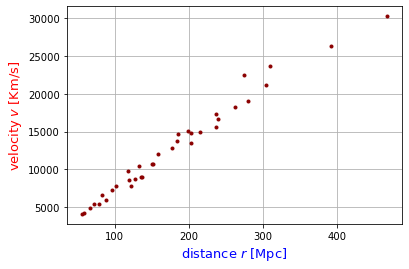

In [10]:
plt.plot(s['Distancia[Mpc]'],s['Velocidad'],'.', color='darkred')
plt.xlabel('distance $r$ [Mpc]',color='b',size=13)
plt.ylabel('velocity $v$ [Km/s]',color='r',size=13)
plt.grid()

In [11]:
#prepare the dataset, and assign a column of "1" to x, to be multiplied by the bias.
r=np.array(s['Distancia[Mpc]'])
v=np.array(s['Velocidad'])
x1=[]
x=r
for i in x:
    i=np.append(i,1.0)
    x1.append(i)
    
x1=np.array(x1)

In [12]:
#we apply the mean square error to the output of the perceptron, when processing the dataset.
def error(W,x=x1,y=v):
    s=0
    for i in range(0,len(y)):
        l=0.5*(y[i]-np.dot(x1[i],W))**2
        s=s+l
    return s

In [22]:
#evaluating in desgrad function
H0,b=desgrad(error,[1,500],eta=0.01,steps=1000,tolerance=1e-8,cota=100.0)
print('The Hubble constant is ',H0)
print('The bias is',b)

The Hubble constant is  68.00000020020342
The bias is 567.0000002002876


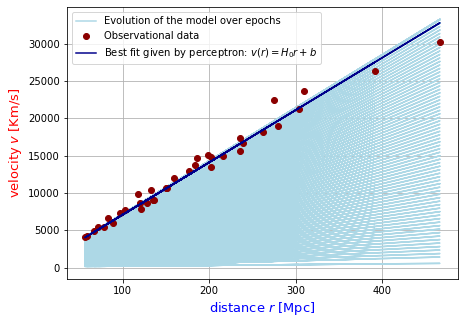

In [41]:
#now, we plot some steps made by learning process of the peerceptron
index=np.arange(2,90,1)
def desgrad1(f,X0,eta, steps, cota, tolerance):
    i=0
    pendientes=[]
    while True:
        i=i+1
        X0=X0-eta*np.array(gradcot(f,X0, cota))
        if np.linalg.norm(gradcot(f,X0, cota))<tolerance or i>steps: break
        if i in index:
            pendientes.append(X0)
    return pendientes

A=desgrad1(error,[1,1],eta=0.01,steps=100,tolerance=1e-8,cota=100.0)

plt.figure(figsize=(7,5))
for a in A:
    m,b=a
    plt.plot(r,m*r+b,color='lightblue')
m1,b1=A[-1]
plt.plot(r,1*r+b,color='lightblue', label='Evolution of the model over epochs')
plt.plot(r,v,'o',label='Observational data',color='darkred')
plt.plot(r,m1*r+b1,label='Best fit given by perceptron: $v(r)=H_0 r+b$',color='darkblue')
plt.xlabel('distance $r$ [Mpc]',color='b',size=13)
plt.ylabel('velocity $v$ [Km/s]',color='r',size=13)
plt.grid()
plt.legend()

# Deep neural networks

In [3]:
#common activation functions

# RELU
def relu(x):
    return x * (x > 0)

def drelu(x):
    return 1. * (x > 0)

#IDENTIDAD
def iden(X):
    return X
def diden(X):
    return 1

#SIGMOIDE
def sigmoid(X):
    return 1/(1+np.exp(-X))
def dsigmoid(X):
    return sigmoid(X)*(1-sigmoid(X))

#TANGENTE HIPORBÓLICA
def tanh(X):
    return np.tanh(X)
def dtanh(X):
    return 1-tanh(X)**2



In [4]:
#algorithm for splitting the dataset into training and validation 
def split(X,Y,porcent): #porcent must be between 0 and 1, it is the asigned porcent to the training dataset.
    n=floor(porcent*len(X))
    index=random.sample(range(len(X)),n)
    X_learn=[]
    Y_learn=[]
    for i in index:
        X_learn.append(X[i])
        Y_learn.append(Y[i])
    X_val=np.delete(X,index, axis=0)
    Y_val=np.delete(Y,index, axis=0)
    
    X_learn=np.array(X_learn)
    Y_learn=np.array(Y_learn)
    return X_learn,Y_learn,X_val,Y_val

In [5]:
#we define forward propagation for a single hidden layer network, 
#with activation function id(x) at the output layer.
def forward(X,W1,b1,W2,b2,activation):
    z1=np.dot(X,W1)+b1
    a1=activation(z1)
    z2=np.dot(a1,W2)+b2
    a2=z2
    return a2

#"activation" can be replaced for any activation function, like mencioned above

In [6]:
# MSE cost function
def error(C):
    m=len(C)
    e=(1/(2*m))*np.linalg.norm(C)**2
    return e

In [46]:
# we define the neural network or multi layer perceptron
def neuralnet(X,Y,nodes,split_porcent,learning_rate,epochs,activation,dactivation):
    #input, output shapes
    n_inputs=X.shape[1]
    n_output=Y.shape[1]
    
    #training and validation sets
    X_train,Y_train,X_val,Y_val = split(X,Y,split_porcent)
    
    #forward
    W1=np.random.randn(n_inputs,nodes)
    W2=np.random.randn(nodes,n_output)
    b1=np.random.randn(nodes)
    b2=np.random.randn(n_output)
    
    #epochs
    errors=[]
    validation=[]
    for i in range(epochs+1):
        #Forward
        z1=np.dot(X_train,W1)+b1
        a1=activation(z1)
        z2=np.dot(a1,W2)+b2
        a2=z2
        
        #backpropagation
        delta2 = a2-Y_train
        delta1 = (delta2).dot(W2.T)*dactivation(z1)
        
        errors.append(error(delta2)) #we save the error in this epoch

        W2 -= learning_rate * a1.T.dot(delta2)
        b2 -= learning_rate * (delta2).sum(axis=0)

        W1 -= learning_rate * X_train.T.dot(delta1)
        b1 -= learning_rate * (delta1).sum(axis=0)
        print("epoch %d, cost %f" %(int(i),error(delta2)))
        
        #model validation
        z1=np.dot(X_val,W1)+b1
        a1=activation(z1)
        z2=np.dot(a1,W2)+b2
        a2=z2
        delta = a2-Y_val
        validation.append(error(delta))
        
    plt.plot(range(i+1),errors,color='darkcyan',label='Training')
    plt.plot(range(i+1),validation,color='darkred',label='Validation')
    plt.grid()
    plt.legend()
    return W1,b1,W2,b2

### Modeling Friedmann equation

In [9]:
#some simulated data of the friedmann equation and its associated error
url='https://raw.githubusercontent.com/JuanDDiosRojas/Arts/main/Deep%20Learning%20and%20its%20applications%20to%20cosmology/datos_simulados.csv'
Friedmann_data=pd.read_csv(url,header=None)
F_data=np.array(Friedmann_data)

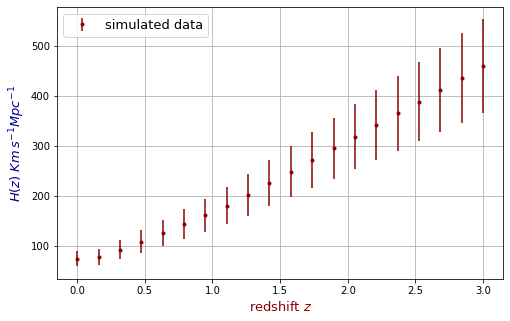

In [10]:
plt.figure(figsize=(8,5))
X=F_data[:,0]
Y=F_data[:,1]
t=np.linspace(0, 3, 20)
t=t.reshape(20,1)
#plt.plot(t,X)
plt.errorbar(t,X,yerr=Y ,ecolor='darkred', color='darkred',label='simulated data',fmt='.')
plt.xlabel('redshift $z$', color='darkred', size=13)
plt.ylabel('$H(z)$ $Km\,s^{-1}Mpc^{-1}$', color='darkblue', size=13)
plt.grid()
plt.legend(loc='upper left',fontsize=13)
#plt.savefig('fried1_data.pdf')

In [ ]:
#This ANN was trained with the folowing params
W1,b1,W2,b2=neuralnet(t,datos,nodes=100,split_porcent=0.65,learning_rate=0.0001,epochs=5000,activation=sigmoid,dactivation=dsigmoid)

Whit the error curves:
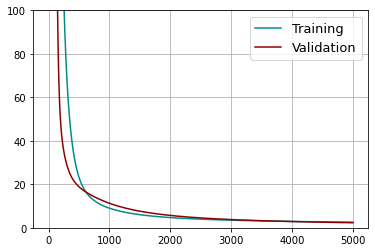

the parameters of this trained model were saved in the repository as "parametros_red.py". 
Here you can see the result of the training.

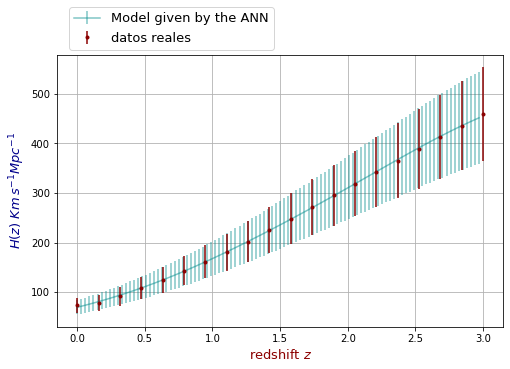

In [17]:
W1,b1,W2,b2=np.load('parametros_red.npy',allow_pickle=True)#params for this model

plt.figure(figsize=(8,5))
t0=np.arange(0,3,0.03)
t0=t0.reshape(len(t0),1)
A=forward(t0,W1,b1,W2,b2,sigmoid)
H_0=A[:,0]
err=A[:,1]
plt.errorbar(t0,H_0,yerr=err,fmt='-' ,ecolor='darkcyan', color='darkcyan',label='Model given by the ANN',alpha = 0.5)
plt.errorbar(t,X,yerr=Y ,ecolor='darkred',fmt='.', color='darkred',label='datos reales')
plt.legend(bbox_to_anchor =(0.5,1.2),fontsize=13)
plt.xlabel('redshift $z$', color='darkred',size=13)
plt.ylabel('$H(z)$ $Km\,s^{-1}Mpc^{-1}$', color='darkblue',size=13)
plt.grid()
#plt.savefig('fried1_model.pdf')

### Second model for Friedmann equation

We start with the Friedmann equation in the newt form:
$$
\begin{equation}
    \frac{H^2}{H_0^2} = \Omega_{r,0}(1+z)^4 + \Omega_{m,0}(1+z)^3+ \Omega_{k,0}(1+z)^2 + \Omega_{\Lambda,0}.
    \label{eq:friedmann2}
\end{equation}
$$

Then, we generate different models by varying the initial parameters
$\Omega_{m,0}$ y $H_0$

and setting $\Omega_{r,0}=0$ 

Then equation becomes into:
$$
\begin{equation}
    \frac{H^2}{H_0^2} =\Omega_{m,0}(1+z)^3 + \Omega_{k,0}(1+z)^2 + \Omega_{\Lambda,0}
\end{equation}
$$

Then   $\Omega_{k,0}=1-\Omega_{m,0}- \Omega_{\Lambda,0}$


and $H_0 \in [0.66, 0.70]$

$\Omega_{m,0} \in [0.2, 0.5]$

$\Omega_{\Lambda}=0.7$


In [31]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import itertools

def friedmann(params):
    z=params[:,0]
    Om=params[:,1]
    H0=params[:,2]
    
    Ol=1-Om
    a=Om*(1+z)**3 + Ol
    return np.sqrt( H0**2 * a ) 

z=np.arange(0,3,0.1)
OM=np.arange(0.2,0.51,0.01)
H0=np.arange(0.66,0.71,0.01)

a=itertools.product(z,OM,H0)
X=np.array(list(a))
Y=friedmann(X)
Y=Y.reshape(len(Y),1)

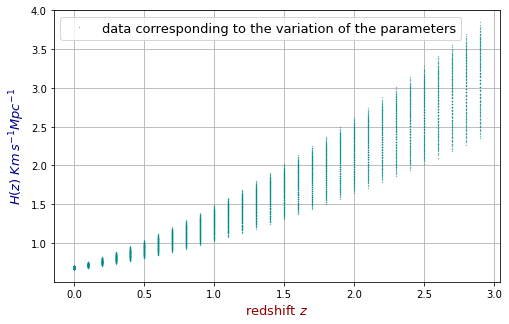

In [58]:
plt.figure(figsize=(8,5))
plt.plot(X[:,0],Y,'.',markersize=0.5, color='darkcyan', label='data corresponding to the variation of the parameters')
plt.legend(loc='upper left',fontsize=13)
plt.xlabel('redshift $z$', color='darkred',size=13)
plt.ylabel('$H(z)$ $Km\,s^{-1}Mpc^{-1}$', color='darkblue',size=13)
plt.grid()
#plt.savefig('fried2_data.pdf')

In [ ]:
#MLP training hyperparams
W1,b1,W2,b2=neuralnet(X,Y,nodes=25,split_porcent=0.8,learning_rate=0.0001,epochs=1000,activation=sigmoid,dactivation=dsigmoid)

with the error curves
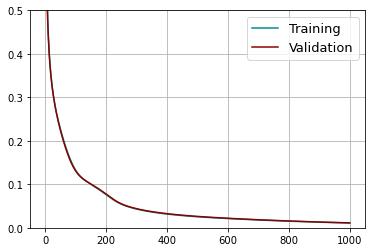

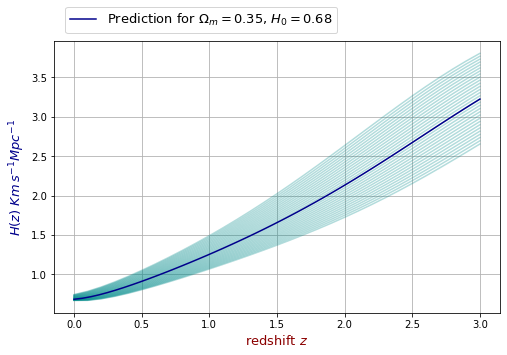

In [75]:
W1,b1,W2,b2=np.load('parametros_friedmann1.npy',allow_pickle=True)

z0=np.linspace(0,3,50) #Fijamos el dominio en z
omega_m=0.35
H_0=0.68
dom1=np.array(list(itertools.product(z0,[omega_m],[H_0])))
z0=np.linspace(0,3,50) #Fijamos el dominio en z
z=np.arange(0,3.1,0.1)
OM=np.linspace(0.2,0.51,30)
H0=np.arange(0.66,0.71,30)
plt.figure(figsize=(8,5))
for i in OM:
    for j in H0:
        dom=np.array(list(itertools.product(z,[i],[j])))
        plt.plot(z,forward(dom,W1,b1,W2,b2,sigmoid), color='darkcyan', alpha=0.3)

plt.plot(z0,forward(dom1,W1,b1,W2,b2,sigmoid),label='Prediction for $\Omega_m=0.35$, $H_0=0.68$', color='darkblue')  
plt.xlabel('redshift $z$', color='darkred',size=13)
plt.ylabel('$H(z)$ $Km\,s^{-1}Mpc^{-1}$', color='darkblue',size=13)
plt.legend(bbox_to_anchor =(0.65,1.15),fontsize=13)
plt.grid() 

#plt.savefig('fried2_model.pdf')

### Cosmological differential equations

Solve:

$\dot \rho_i + 3(1+\gamma)H\rho_i = 0$

$H^2 = \frac{\kappa_0}{3}\sum \rho_i$

Change of variabke to:

$\Omega_i = \frac{\kappa_0 }{3H^2} \rho_i$

### 1. Generate the dataset
the coefficients \Omega_i will vary over these ranges:



$O_m \in [0.1, 0.5]$

$H_0 \in [65, 80]$

$t \in [0,-12]$

In [3]:
O_m=np.arange(0.1,0.51,0.01)
H_0=np.arange(66,81,1)
t=np.linspace(0,-12,50)

### 2 transform the differential equation into a function with the dimensionless parameters as variables

In [11]:
def RHS(Omega_i, lna, gamma=0):
    x, y, z, H = Omega_i
    #x, y, z = Omega_i
    pi = 3*x + 4*y
    return [x*(-3 + pi), y*(-4 + pi), z*pi, -0.5*H*pi]
    #return [x*(-3 + pi), y*(-4 + pi), z*pi]

def EDO(t,Om,H0):
    #t,Or,Om,Ol=X
    Or=0.0001
    Ol=1-Or-Om
    #H0 = 70.
    y0 = [Om, Or, Ol, H0]
    result = odeint(RHS, y0, t)
    return result

In [12]:
#lets generate the cartesian product between the intervals
Y0=[]
#este ciclo llena la lista fijando un Om y pasando todos los Or
for i in O_m:
    for j in H_0:
        Y0.extend(EDO(t,i,j))
Y0=np.array(Y0)

X0=[]
for Om in O_m:
    for H0 in H_0:
        for T in t:
            X0.append([T,Om,H0])
X0=np.array(X0)

### 3. apply a max-min transformation to the labels

In [13]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
Y2 = scaler.fit_transform(Y0)

In [14]:
#Now, here are the datasets
print('feactures= \n',X0)
print('\n')
print('labels= \n',Y2)

feactures= 
 [[  0.           0.1         66.        ]
 [ -0.24489796   0.1         66.        ]
 [ -0.48979592   0.1         66.        ]
 ...
 [-11.51020408   0.51        81.        ]
 [-11.75510204   0.51        81.        ]
 [-12.           0.51        81.        ]]


labels= 
 [[9.47448195e-02 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [1.83595685e-01 1.41110961e-04 9.01997379e-01 1.60306298e-10]
 [3.22311048e-01 4.33937896e-04 7.48914062e-01 4.71113879e-10]
 ...
 [4.29301508e-02 9.57189973e-01 1.49317378e-10 3.79051960e-01]
 [3.26769959e-02 9.67414438e-01 1.49696183e-10 6.15329091e-01]
 [2.44968723e-02 9.75571673e-01 1.50248337e-10 1.00000000e+00]]


### 4. set up the network architecture in Keras and start data processing

In [ ]:
#Dos paredes ocultas
nodos=150
split_size=0.8
learning_rate=0.001
epocas=500

#Separamos los datos en validación y entrenamiento
X_learn,Y_learn,X_val,Y_val=split(X0,Y2,split_size)

#Armamos el modelo con estructura 'Sequential'
model=models.Sequential()

#la primer capa recibe un numero solamente, usaremos sigmoide como función de activación para la capa oculta
capa1=layers.Dense(nodos, input_shape=(3,),use_bias=1,activation='sigmoid')
capa2=layers.Dense(nodos,use_bias=1,activation='sigmoid')
capa3=layers.Dense(nodos,use_bias=1,activation='sigmoid')
capa4=layers.Dense(nodos,use_bias=1,activation='sigmoid')
#para la capa de salida usamos Id como activación
salida=layers.Dense(4,use_bias=1)

#armamos el modelo
model.add(capa1)
model.add(capa2)
model.add(capa3)
model.add(capa4)
model.add(salida)
#Ahora definimos el paso de compilación, con learning rate=0.001
#Función de error cuadrático medio


model.compile(optimizer=optimizers.RMSprop(lr=learning_rate), loss='mse')

#por último traemos los datos de entrenamiento y los procesamos con 'fit()'
history=model.fit(X_learn,Y_learn,validation_data=(X_val, Y_val),epochs=epocas)

error=history.history['loss']
exac=history.history['val_loss']
epochs=np.arange(0,len(error))
plt.plot(epochs,error,label='Error entrenamiento',color='darkblue')
plt.plot(epochs,exac,label='Error Validación',color='r')
plt.legend()
plt.grid()
plt.title('Error durante el entrenamiento',color='red')

$\uparrow$ This This was the neural network with which he generated the model for these differential equations

It had the next error curves $\downarrow$

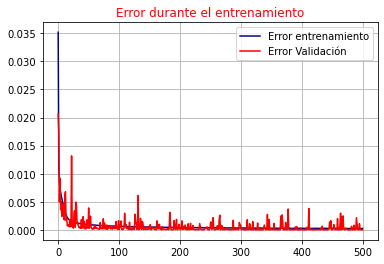

### 5. Model performance:  for $\Omega_{m,0}=0.3$, $H_0=70$

The model was saved in the repository as "modelo_final.h5"

In [16]:
model = models.load_model('modelo_final.h5')

Text(-8.5, 0.1, '$\\Omega_{\\Lambda}$')

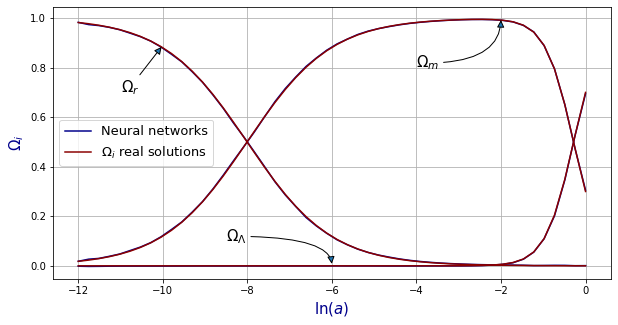

In [21]:
Z=np.linspace(0,-12,50)
dom=[]
dom2=[]
dom3=[]
#different combinations for the params

for z in Z: dom.append([z,0.5,80]) 
A=model.predict(dom)               
# ¡¡¡ The inverse transformation must be applied in order to return the labels to their original ranges!!!
A=scaler.inverse_transform(A) 

for z in Z: dom2.append([z,0.3,70]) 
B=model.predict(dom2)
B=scaler.inverse_transform(B)

for z in Z: dom3.append([z,0.4,67]) 
C=model.predict(dom3)
C=scaler.inverse_transform(C)
#función real
D=EDO(Z, 0.3,70)



#Realvs model
plt.figure(figsize=(10,5))
plt.plot(Z,B[:,0],color='darkblue')
plt.plot(Z,B[:,1],color='darkblue')
plt.plot(Z,B[:,2],color='darkblue', label='Neural networks')
#plt.plot(Z,B[:,3])


plt.plot(Z,D[:,0],color='darkred')
plt.plot(Z,D[:,1],color='darkred')
plt.plot(Z,D[:,2],color='darkred', label='$\Omega_i$ real solutions')
#plt.plot(Z,D[:,3])

#plt.title()
plt.xlabel('$\ln(a)$', size=15, color='darkblue')
plt.ylabel('$\Omega_i$', size=15, color='darkblue')
plt.grid()
plt.legend(fontsize=13)

plt.annotate('$\Omega_m$', xy=(-2,1), xytext=(-4,0.8), size=15,
           arrowprops=dict(arrowstyle='-|>', connectionstyle="angle3,angleA=0,angleB=-90"))

plt.annotate('$\Omega_r$', xy=(-10,0.89), xytext=(-11,0.7),size=15,
           arrowprops=dict(arrowstyle='-|>'))

plt.annotate('$\Omega_{\Lambda}$', xy=(-6,0), xytext=(-8.5,0.1),size=15,
           arrowprops=dict(arrowstyle='-|>', connectionstyle="angle3,angleA=0,angleB=90"))

#plt.savefig('red_vs_sol.pdf')

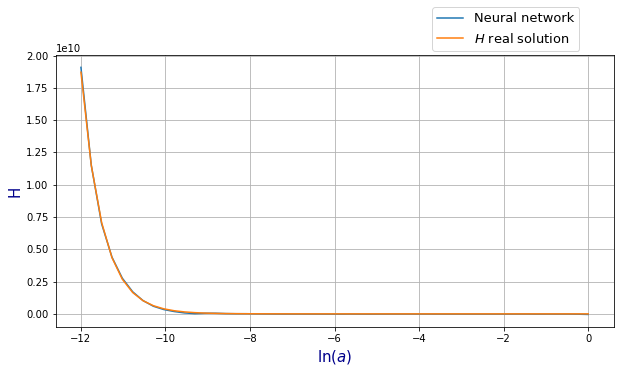

In [26]:
#H realvs model
plt.figure(figsize=(10,5))
plt.plot(Z,B[:,3], label='Neural network')
plt.plot(Z,D[:,3], label='$H$ real solution')

plt.xlabel('$\ln(a)$', size=15, color='darkblue')
plt.ylabel('H', size=15, color='darkblue')
plt.grid()
#plt.legend(fontsize=13)
plt.legend(bbox_to_anchor =(0.95,1.2),fontsize=13)
#plt.savefig('H_sol_vs_net.pdf')

### Solutions to many different parameters

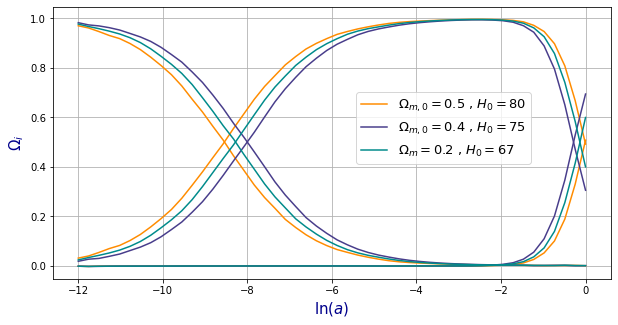

In [35]:
plt.figure(figsize=(10,5))
plt.plot(Z,A[:,0], color='darkorange',label='$\Omega_{m,0} = 0.5$ , $H_0 = 80$')
plt.plot(Z,A[:,1], color='darkorange')
plt.plot(Z,A[:,2], color='darkorange')

plt.plot(Z,B[:,0], color='darkslateblue', label='$\Omega_{m,0} = 0.4$ , $H_0 = 75$')
plt.plot(Z,B[:,1], color='darkslateblue')
plt.plot(Z,B[:,2], color='darkslateblue')

plt.plot(Z,C[:,0], color='darkcyan', label='$\Omega_m = 0.2$ , $H_0 = 67$' )
plt.plot(Z,C[:,1], color='darkcyan')
plt.plot(Z,C[:,2], color='darkcyan')
#plt.ylim(-0.05,1.5)
plt.legend(bbox_to_anchor =(0.7,0.4),fontsize=13)
#plt.legend(fontsize=13,loc ="upper left")
plt.xlabel('$\ln(a)$', size=15, color='darkblue')
plt.ylabel('$\Omega_i$', size=15, color='darkblue')
plt.grid()
#plt.savefig('many_parameters.pdf')

### Finally, time comparison

In order to make a comparison as fair as possible. 

Let's vectorize the function of the differential equations

In [4]:
def RHS(Omega_i, lna, gamma=0):
    x, y, z, H = Omega_i
    #x, y, z = Omega_i
    pi = 3*x + 4*y
    return [x*(-3 + pi), y*(-4 + pi), z*pi, -0.5*H*pi]
    #return [x*(-3 + pi), y*(-4 + pi), z*pi]

def EDO(X):
    Om,H0=X
    t=np.linspace(0,-12,50)
    #t,Or,Om,Ol=X
    Or=0.0001
    Ol=1-Or-Om
    #H0 = 70.
    y0 = [Om, Or, Ol, H0]
    result = odeint(RHS, y0, t)
    return result

model = models.load_model('modelo_final.h5')

In [6]:
#ANN and function datasets
O_m=np.linspace(0.1,0.51,100)
H_0=np.linspace(66,81,100)
t=np.linspace(0,-12,50)

X0=[]
X1=[]
for Om in O_m:
    for H0 in H_0:
        X1.append([Om,H0])
        for T in t:
            X0.append([T,Om,H0])
X0=np.array(X0) #para la red
X1=np.array(X1) #para EDO

### versus
Now we measure the time it takes for the network to generate the solutions for 10000 different initial conditions.

In [7]:
import time

In [8]:
#odeint
%timeit list(map(EDO,X1))

14 s ± 123 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
#ANN
%timeit scaler.inverse_transform(model.predict(X0))

6.64 s ± 165 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# classification of interstellar objects

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from math import floor
import pandas as pd
import random
from sklearn.metrics import confusion_matrix
import sklearn.metrics
import seaborn as cns

In [2]:
#algorithm for splitting the dataset into training and validation 
def split(X,Y,porcent): #porcent must be between 0 and 1, it is the asigned porcent to the training dataset.
    n=floor(porcent*len(X))
    index=random.sample(range(len(X)),n)
    X_learn=[]
    Y_learn=[]
    for i in index:
        X_learn.append(X[i])
        Y_learn.append(Y[i])
    X_val=np.delete(X,index, axis=0)
    Y_val=np.delete(Y,index, axis=0)
    
    X_learn=np.array(X_learn)
    Y_learn=np.array(Y_learn)
    return X_learn,Y_learn,X_val,Y_val

In [24]:
objects=pd.read_csv('https://raw.githubusercontent.com/JuanDDiosRojas/Arts/main/Deep%20Learning%20and%20its%20applications%20to%20cosmology/Skyserver_SQL2_27_2018%206_51_39%20PM.csv')

In [25]:
objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [26]:
objects

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [27]:
objects['rerun'].unique()

array([301], dtype=int64)

In [28]:
objects['objid'].unique()

array([1.23765e+18])

We will dispense with the 'objid' and 'rerun' variables because their values are common to all classes.

In [29]:
objects=objects.drop({'objid','rerun'}, axis=1)

lets make the one-hot encoding

[star, galaxy, qso]

In [33]:
classes=[]
for i in objects['class']:
    if i=='STAR': classes.append([1,0,0])
    if i=='GALAXY': classes.append([0,1,0])
    if i=='QSO': classes.append([0,0,1])
classes=np.array(classes);classes

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [39]:
# and dropt the class feature
objects=objects.drop({'class'}, axis=1)

and this is the original distribution of the dataset

array([[<AxesSubplot:title={'center':'ra'}>,
        <AxesSubplot:title={'center':'dec'}>,
        <AxesSubplot:title={'center':'u'}>,
        <AxesSubplot:title={'center':'g'}>],
       [<AxesSubplot:title={'center':'r'}>,
        <AxesSubplot:title={'center':'i'}>,
        <AxesSubplot:title={'center':'z'}>,
        <AxesSubplot:title={'center':'run'}>],
       [<AxesSubplot:title={'center':'camcol'}>,
        <AxesSubplot:title={'center':'field'}>,
        <AxesSubplot:title={'center':'specobjid'}>,
        <AxesSubplot:title={'center':'redshift'}>],
       [<AxesSubplot:title={'center':'plate'}>,
        <AxesSubplot:title={'center':'mjd'}>,
        <AxesSubplot:title={'center':'fiberid'}>, <AxesSubplot:>]],
      dtype=object)

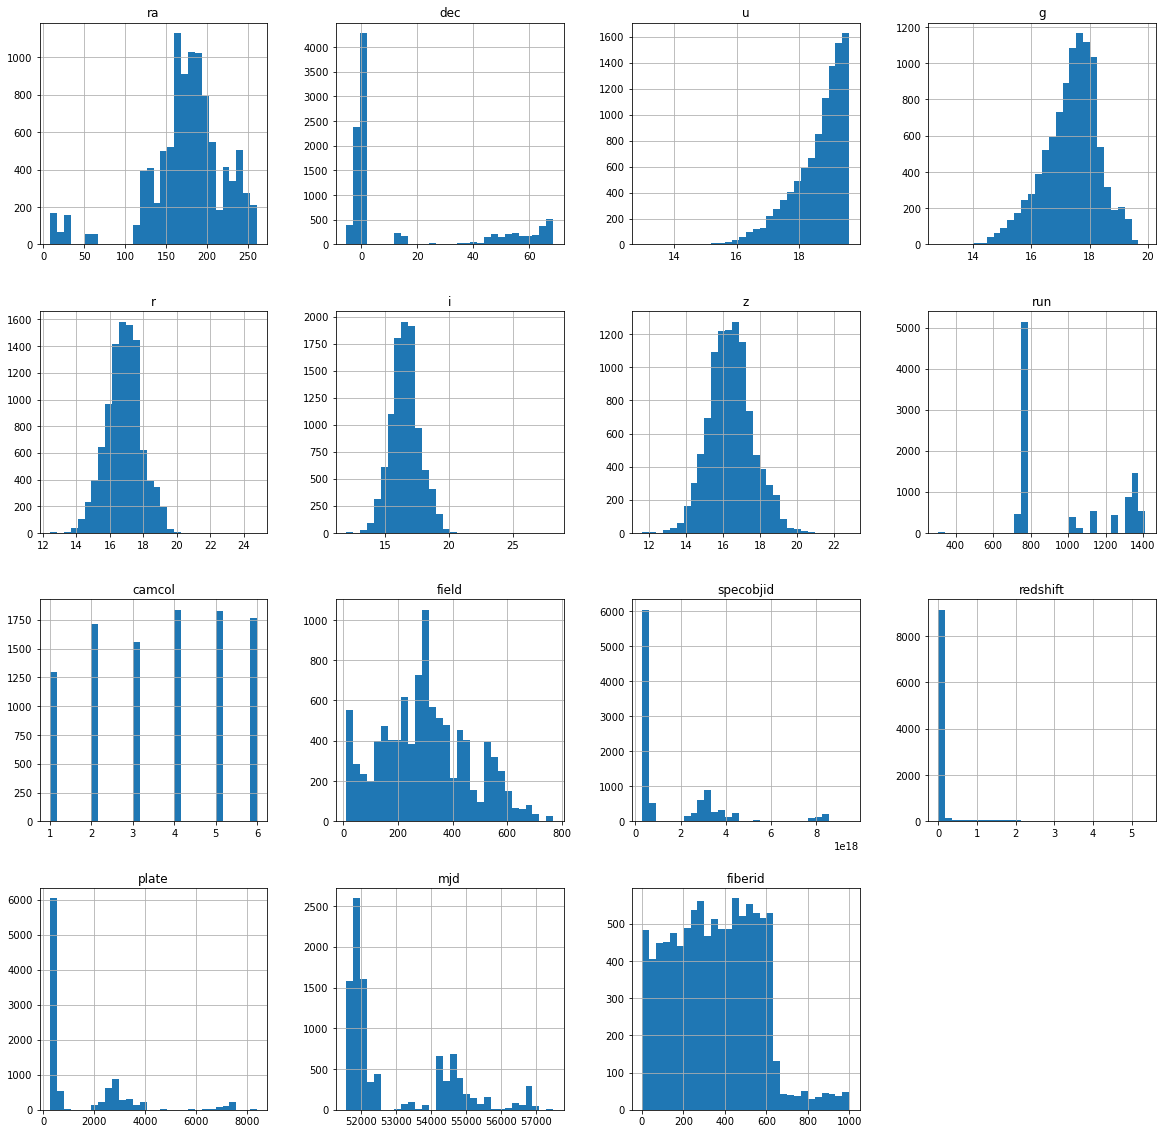

In [40]:
objects.hist(figsize=[20,20], bins=30)

we prepare the learning set with a z-point normalization

array([[<AxesSubplot:title={'center':'ra'}>,
        <AxesSubplot:title={'center':'dec'}>,
        <AxesSubplot:title={'center':'u'}>,
        <AxesSubplot:title={'center':'g'}>],
       [<AxesSubplot:title={'center':'r'}>,
        <AxesSubplot:title={'center':'i'}>,
        <AxesSubplot:title={'center':'z'}>,
        <AxesSubplot:title={'center':'run'}>],
       [<AxesSubplot:title={'center':'camcol'}>,
        <AxesSubplot:title={'center':'field'}>,
        <AxesSubplot:title={'center':'specobjid'}>,
        <AxesSubplot:title={'center':'redshift'}>],
       [<AxesSubplot:title={'center':'plate'}>,
        <AxesSubplot:title={'center':'mjd'}>,
        <AxesSubplot:title={'center':'fiberid'}>, <AxesSubplot:>]],
      dtype=object)

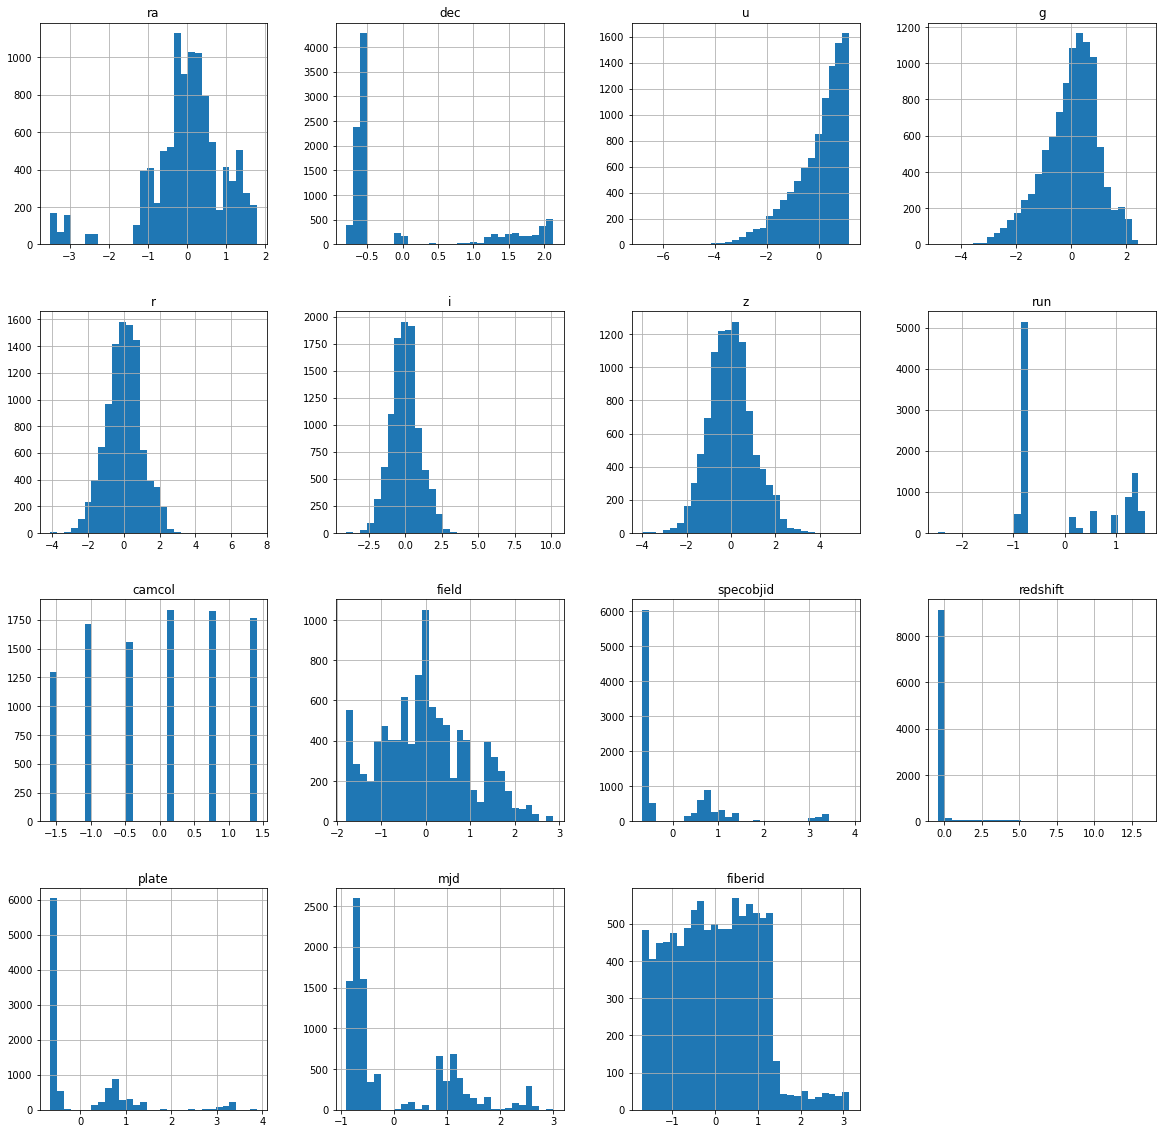

In [41]:
X=(objects-objects.mean())/objects.std()

X.hist(figsize=[20,20], bins=30)

we will separate the complete dataset into 80% for the learning process and 20 for a test set 
on which the trained model will be applied.

In [43]:
X=np.array(X)
X_modelo,Y_modelo,X_pred,Y_pred=split(X,classes,0.8)

the architecture chosen for this task and its hyperparameters are as follows

In [ ]:
nodos=150
split_size=0.8
taza=0.001
epocas=80
dropout=False

#Separamos los datos en validación y entrenamiento
X_learn,Y_learn,X_val,Y_val=split(X_modelo,Y_modelo,split_size)

#Armamos el modelo con estructura 'Sequential'
model=Sequential()

#la primer capa recibe un numero solamente, usaremos sigmoide como función de activación para la capa oculta
#capa 1
model.add(Dense(nodos, input_shape=(13,),activation='sigmoid'))

#capa 2
model.add(Dense(nodos,activation='sigmoid'))
if dropout==True:
    model.add(Dropout(0.5))
    
#capa 3
model.add(Dense(nodos,activation='sigmoid'))
if dropout==True:
    model.add(Dropout(0.5))
    
#capa4
model.add(Dense(nodos,activation='sigmoid'))
if dropout==True:
    model.add(Dropout(0.5))
    
#para la capa de salida usamos softmax como activación
model.add(Dense(3,activation='softmax'))


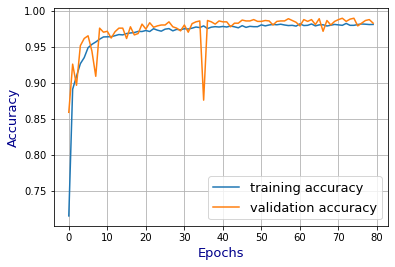

In [45]:
from keras import models
model = models.load_model('modelo_class.h5')

In [47]:
#then, evaluate it in the test set
model.evaluate(X_pred,Y_pred)

63/63 [==============================] - 0s 1ms/step - loss: 0.0817 - accuracy: 0.9795


[0.08172132819890976, 0.9794999957084656]

In [62]:
def plot_cm(Y_reales,Y_predichos, labels, porcentaje=False):
    #Generamos la matriz de confusión a partir de los dos arreglos
    matrix = sklearn.metrics.confusion_matrix(Y_reales.argmax(axis=1), Y_predichos.argmax(axis=1))
    
    plt.title("Confusion matrix")
    #Aquí se divie si la queremos en porcentaje o en números
    if porcentaje==False: ax = cns.heatmap(matrix, annot=True, cmap="OrRd", cbar_kws={'label': 'scale'})
    if porcentaje==True:
        m=np.zeros(matrix.shape)
        for j in range(0,matrix.shape[1]):
            m[:,j]=matrix[:,j]/np.sum(matrix[:,j])
        ax = cns.heatmap(m, annot=True,fmt='.2%',
                                          cmap='OrRd', cbar_kws={'label': 'scale'})
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
 
    ax.set(xlabel="True label", ylabel="Predicted label")

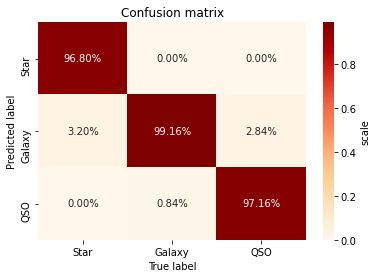

In [63]:
y_test=model.predict(X_pred)
labels=['Star','Galaxy','QSO']
plot_cm(Y_pred,y_test, labels, porcentaje=True)
#plt.savefig('matriz_conf_tesis.pdf')